In [54]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
from shapely.geometry import box, Polygon


##  Planar Enforcement Violation: One polygon overlapping another polygon

<AxesSubplot:>

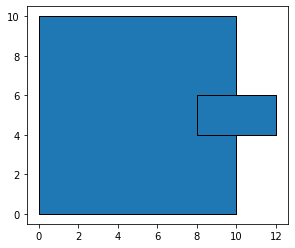

In [55]:
p1 = box(0,0,10,10)
p2 = box(8,4, 12,6)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [56]:
geoplanar.is_overlapping(gdf)

True

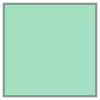

In [57]:
gdf.geometry[0]

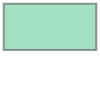

In [58]:
gdf.geometry[1]

In [59]:
gdf = geoplanar.trim_overlaps(gdf)
geoplanar.is_overlapping(gdf)

False

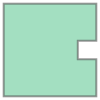

In [60]:
gdf.geometry[0]

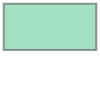

In [61]:
gdf.geometry[1]

##  Planar Enforcement Violation: One polygon overlapping two

<AxesSubplot:>

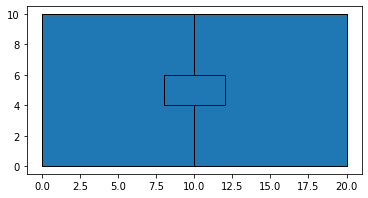

In [62]:
p1 = box(0,0,10,10)
p2 = box(10,0, 20,10)
p3 = box(8,4, 12,6)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf.plot(edgecolor='k')

In [63]:
gdf = geoplanar.trim_overlaps(gdf)

In [64]:
print(gdf.unary_union.area, gdf.area.sum())

200.0 200.0


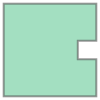

In [65]:
gdf.geometry[0]

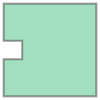

In [33]:
gdf.geometry[1]